In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


np.random.seed(42)

data = {
    "product_id": ["005", "002", "002", "005"],
    "state": ["CA", "OR", "NY", "GA"],
    "date": ["1/7/2019", "2/5/2019", "5/5/2019", "7/3/2019"],
    "rating": ["****", "*", "***", "*"],
    "units_sold": [7, 3, 5, 1],
    "price": ["$7.99", "$2.75", "$2.75", "$7.99"],
}

df = pd.DataFrame(data)
df

,product_id,state,date,rating,units_sold,price
0,005,CA,1/7/2019,****,7,$7.99
1,002,OR,2/5/2019,*,3,$2.75
2,002,NY,5/5/2019,***,5,$2.75
3,005,GA,7/3/2019,*,1,$7.99


<IPython.core.display.Javascript object>

hmmm... needs more data... and missingness!  ლ( ◕ 益 ◕ ) ლ

I just left this part in as some example code if you want to review it.  No need to get into at this point; its more means to an end than the topic at hand.

Scroll on to the next dataframe output if you dont care....

In [3]:
# Just makin up some data... n rows of it
n = 50

<IPython.core.display.Javascript object>

In [4]:
# product_id & price --------------------------------------------------------
# done together for consistent pricing

# zero padded ids
ids = [f"{i:03}" for i in range(n * 2)]

# Random prices
prices = np.random.uniform(0.99, 24.99, size=n * 2)

# Format as money
prices = np.array([f"${p:0.2f}" for p in prices])

# Make some values nan
nan_idxs = np.random.choice(prices.size, size=5, replace=False)
prices[nan_idxs] = np.nan


# put in dataframe to sample pairs rather than 1 at a time
# this will keep same price for each id
df = pd.DataFrame({"product_id": ids, "price": prices})
df = df.sample(n, replace=True).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [5]:
# state -----------------------------------------------------------------------
states = np.random.choice(
    ["CA", "OR", "NY", "FL", "TN", "AZ", "GA", "ID", "HI"], size=n, replace=True
)

df["state"] = states

<IPython.core.display.Javascript object>

In [6]:
# date ------------------------------------------------------------------------
# lazy way
days = np.random.choice(range(1, 26), size=n, replace=True)
months = np.random.choice(range(1, 13), size=n, replace=True)
years = np.random.choice(range(2010, 2020), size=n, replace=True)

dates = [f"{y}-{m:02}-{d:02}" for y, m, d in zip(years, months, days)]
dates = sorted(dates)

df["date"] = dates

<IPython.core.display.Javascript object>

In [7]:
# rating ----------------------------------------------------------------------
ratings = ["*" * np.random.randint(1, 6) for _ in range(n)]

df["rating"] = ratings

<IPython.core.display.Javascript object>

In [8]:
# units_sold ------------------------------------------------------------------
# Randomness
units_sold = np.random.normal(5, 3, n)

# Make sure no value is below 1. cause you cant sell less than one units. prolly
units_sold = np.clip(units_sold, 1, np.inf)

# Add a trend
units_sold += np.arange(0, n)

# Round because you cant sell fractional units. prolly
units_sold = np.round(units_sold)

# Make some values nan
nan_idxs = np.random.choice(units_sold.size, size=5, replace=False)
units_sold[nan_idxs] = np.nan

df["units_sold"] = units_sold

<IPython.core.display.Javascript object>

In [9]:
# put in same order as original
df = df[["product_id", "state", "date", "rating", "units_sold", "price"]]

# shuffle rows
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,product_id,state,date,rating,units_sold,price
0,081,FL,2010-06-22,***,11.0,$15.95
1,056,TN,2011-05-02,*,14.0,$3.11
2,031,TN,2014-08-03,**,NaN,$5.08
3,006,NY,2013-03-13,**,23.0,nan
4,091,CA,2011-01-19,***,8.0,$18.11


<IPython.core.display.Javascript object>

Inspect the data frame with the `info()` method.  Where do we have nans?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
product_id    50 non-null object
state         50 non-null object
date          50 non-null object
rating        50 non-null object
units_sold    45 non-null float64
price         50 non-null object
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


<IPython.core.display.Javascript object>

Further inspect the data frame with `isna()` or `isnull()`

What percentage of each column is nan?

In [11]:
df.isna().mean()

product_id    0.0
state         0.0
date          0.0
rating        0.0
units_sold    0.1
price         0.0
dtype: float64

<IPython.core.display.Javascript object>

Convert the price column to numeric

In [12]:
df["price"] = df["price"].str.replace("$", "")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

<IPython.core.display.Javascript object>

Redo your missing value analysis.

In [13]:
df.isna().mean()

product_id    0.00
state         0.00
date          0.00
rating        0.00
units_sold    0.10
price         0.02
dtype: float64

<IPython.core.display.Javascript object>

Convert the ratings column to numeric

In [14]:
# ratings_map = {"*****": 5, "****": 4, "***": 3, "**": 2, "*": 1}
# df["rating"] = df["rating"].replace(ratings_map)

<IPython.core.display.Javascript object>

In [15]:
# for items in range(len(df["rating"])):
#     df.at[items, "rating"] = len(df[df.at[items, "rating"]])

<IPython.core.display.Javascript object>

In [16]:
df["rating"] = df["rating"].apply(len)

<IPython.core.display.Javascript object>

Convert the date column to a date datatype and sort by it

In [17]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

<IPython.core.display.Javascript object>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
product_id    50 non-null object
state         50 non-null object
date          50 non-null datetime64[ns]
rating        50 non-null int64
units_sold    45 non-null float64
price         49 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.5+ KB


<IPython.core.display.Javascript object>

Now let's address the missing values

* What options do we have?
* Which ones make sense for each column?
    * How do we decide which ones make sense?
    
Once these questions are answered.  Let's apply them until we have no missing values.

In [19]:
# Option 1
df_dropped = df.dropna()

<IPython.core.display.Javascript object>

In [20]:
# Option 2: impute a hard coded value
# df["units_sold"] = df["units_sold"].fillna(0)

<IPython.core.display.Javascript object>

In [21]:
# Option 3: impute a central value
# med = df["units_sold"].median()
# df["units_sold"] = df["units_sold"].fillna(med)

<IPython.core.display.Javascript object>

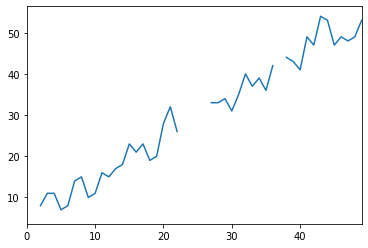

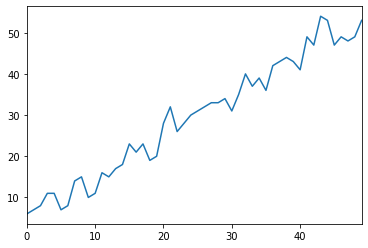

<IPython.core.display.Javascript object>

In [22]:
# Options 4: Use forward fill (see slides) or interpolation

df["units_sold"].plot()
plt.show()

df["units_sold"] = df["units_sold"].interpolate(method="linear")
# df["units_sold"].interpolate(method="linear", inplace=True)

df["units_sold"].plot()
plt.show()